In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt


In [2]:
img = cv2.imread(r'C:\Users\Kishor\ML_PROJECT_3_IMAGE_CLASSIFIER\Model\test_images\sharapova1.jpg')
img.shape

(555, 700, 3)

In [3]:
# Dimension indicates X,Y,RGBA


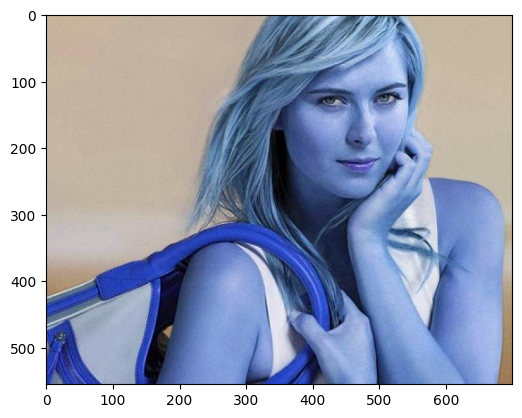

In [4]:
plt.imshow(img)
plt.show()

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

In [6]:
gray

array([[175, 175, 175, ..., 176, 175, 174],
       [175, 175, 175, ..., 177, 175, 174],
       [175, 175, 175, ..., 177, 176, 174],
       ...,
       [ 84,  87,  88, ..., 113, 113, 113],
       [ 88,  89,  90, ..., 113, 113, 113],
       [ 93,  91,  91, ..., 112, 112, 112]], dtype=uint8)

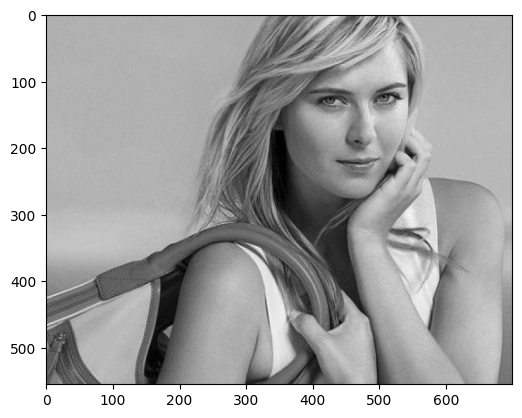

In [7]:
plt.imshow(gray, cmap='gray')

In [8]:
face_cascade=cv2.CascadeClassifier(r'C:\Users\Kishor\ML_PROJECT_3_IMAGE_CLASSIFIER\Model\opencv\haarcascades\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(r'C:\Users\Kishor\ML_PROJECT_3_IMAGE_CLASSIFIER\Model\opencv\haarcascades\haarcascade_eye.xml')

In [9]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[352,  38, 233, 233]])

In [10]:
# This is indicating x, y, height, width

In [11]:
x,y,w,h = faces[0]

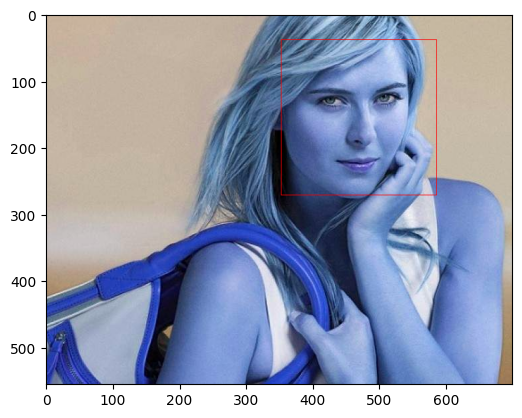

In [12]:
face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0))
plt.imshow(face_img)

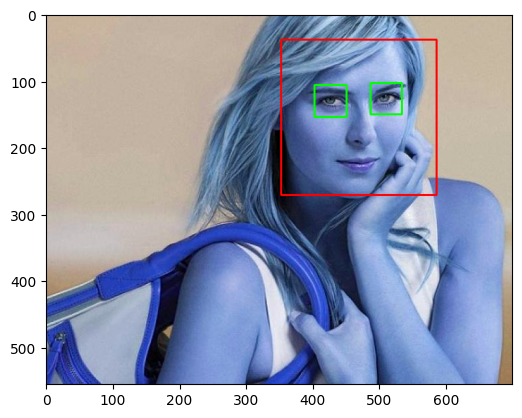

In [13]:
cv2.destroyAllWindows()

for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)

    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (0,255,0),2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

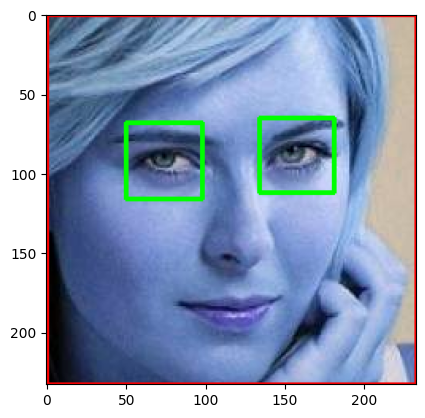

In [14]:
plt.figure()
plt.imshow(roi_color, cmap='gray')
plt.show()

In [15]:
def get_cropped_img(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3,5)

    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
        

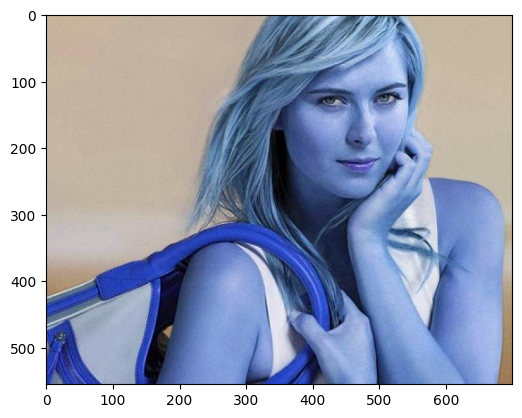

In [16]:
raw_img = cv2.imread(r'C:\Users\Kishor\ML_PROJECT_3_IMAGE_CLASSIFIER\Model\test_images\sharapova1.jpg')
plt.imshow(raw_img)
plt.show()

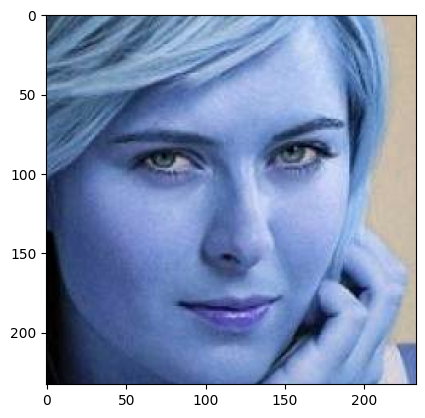

In [17]:
cropped_img = get_cropped_img(r'C:\Users\Kishor\ML_PROJECT_3_IMAGE_CLASSIFIER\Model\test_images\sharapova1.jpg')
plt.imshow(cropped_img)

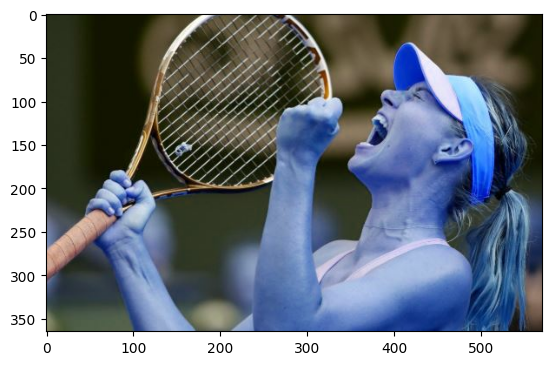

In [18]:
raw_obstructed_img = cv2.imread(r'C:\Users\Kishor\ML_PROJECT_3_IMAGE_CLASSIFIER\Model\test_images\sharapova2.jpg')
plt.imshow(raw_obstructed_img)
plt.show()

In [19]:
cropped_img_obstructed_img = get_cropped_img(r'C:\Users\Kishor\ML_PROJECT_3_IMAGE_CLASSIFIER\Model\test_images\sharapova2.jpg')
print(cropped_img_obstructed_img)

None


In [20]:
path_from_data = r"E:/pc/ds/sample datasets/ml2_image_classifier/"
path_to_cropped_data = r"C:/Users/Kishor/ML_PROJECT_3_IMAGE_CLASSIFIER/Model/cropped_img/"

In [21]:
import os
img_dirs = []

for entry in os.scandir(path_from_data):
    # print(entry.path)
    if entry.is_dir():
        img_dirs.append(entry.path)

In [22]:
img_dirs

['E:/pc/ds/sample datasets/ml2_image_classifier/lionel_messi',
 'E:/pc/ds/sample datasets/ml2_image_classifier/maria_sharapova',
 'E:/pc/ds/sample datasets/ml2_image_classifier/roger_federer',
 'E:/pc/ds/sample datasets/ml2_image_classifier/serena_williams',
 'E:/pc/ds/sample datasets/ml2_image_classifier/virat_kohli']

In [23]:
#Create new directory for cropped image

import shutil

if os.path.exists(path_to_cropped_data): #Check given path is exists
    shutil.rmtree(path_to_cropped_data) #If exists then remove directory
os.mkdir(path_to_cropped_data) #To create a single dir , use this

In [24]:
#creating folders with name of celebrities 
cropped_image_dirs = []
celebs_file_name_dirs = {}

for img_dir in img_dirs:
    celebs_name = img_dir.split('/')[-1]
    # print(celebs_name)
    count = 1
    celebs_file_name_dirs[celebs_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_img(entry.path)
        if roi_color is not None:
            cropped_folder =  path_to_cropped_data + celebs_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder) 
                cropped_image_dirs.append(cropped_folder)
                # print(cropped_folder)

            cropped_file_name = celebs_name + str(count) + ".png" 
            cropped_file_path = cropped_folder + "/" + cropped_file_name

            cv2.imwrite(cropped_file_path, roi_color) #first arg is destination path, second arg is file (here is image)

            celebs_file_name_dirs[celebs_name].append(cropped_file_path)
            count+=1
            
            

            

**After adding related in cropped folder, we also deleted unwanted image for better result.**

**Use wave transform to get who are in image.**

In [25]:
#Use wave transform to get who are in image.

import numpy as np
import pywt
import cv2

In [26]:
#Ref: stackoverflow

def w2d(img, mode= "haar", level = 1):
    imArray = img

    #datatype conversion
    #convert to grayscale

    imArray =cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)

    #convert to float
    imArray = np.float32(imArray)
    imArray/= 255;

    #compute coefficient
    coeffs = pywt.wavedec2(imArray,mode,level=level)

    #process coefficient 
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0;

    #recustruction
    imArray_H = pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)

    return imArray_H



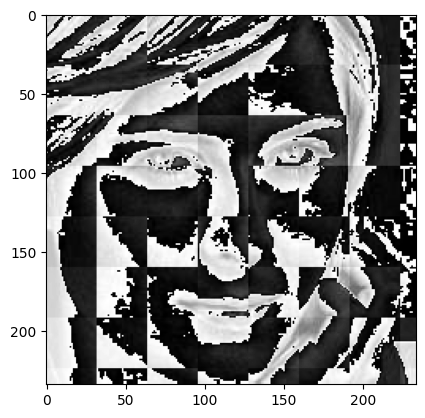

In [27]:
im_har = w2d(cropped_img, 'db1', 5)
plt.imshow(im_har, cmap= "gray")
plt.show()

In [28]:
#again get new celebs_file_name_dict
celebs_file_name_dict = {}

for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebs_file_name_dict[celebrity_name] = file_list

celebs_file_name_dict
    
        
    


{'lionel_messi': ['C:/Users/Kishor/ML_PROJECT_3_IMAGE_CLASSIFIER/Model/cropped_img/lionel_messi\\lionel_messi1.png',
  'C:/Users/Kishor/ML_PROJECT_3_IMAGE_CLASSIFIER/Model/cropped_img/lionel_messi\\lionel_messi10.png',
  'C:/Users/Kishor/ML_PROJECT_3_IMAGE_CLASSIFIER/Model/cropped_img/lionel_messi\\lionel_messi11.png',
  'C:/Users/Kishor/ML_PROJECT_3_IMAGE_CLASSIFIER/Model/cropped_img/lionel_messi\\lionel_messi12.png',
  'C:/Users/Kishor/ML_PROJECT_3_IMAGE_CLASSIFIER/Model/cropped_img/lionel_messi\\lionel_messi13.png',
  'C:/Users/Kishor/ML_PROJECT_3_IMAGE_CLASSIFIER/Model/cropped_img/lionel_messi\\lionel_messi14.png',
  'C:/Users/Kishor/ML_PROJECT_3_IMAGE_CLASSIFIER/Model/cropped_img/lionel_messi\\lionel_messi15.png',
  'C:/Users/Kishor/ML_PROJECT_3_IMAGE_CLASSIFIER/Model/cropped_img/lionel_messi\\lionel_messi16.png',
  'C:/Users/Kishor/ML_PROJECT_3_IMAGE_CLASSIFIER/Model/cropped_img/lionel_messi\\lionel_messi17.png',
  'C:/Users/Kishor/ML_PROJECT_3_IMAGE_CLASSIFIER/Model/cropped_img/

In [29]:
X = []
y = []

In [30]:
class_dict = {}
count = 0

for celebrity_name in celebs_file_name_dict.keys():
    class_dict[celebrity_name] = count
    count+= 1

class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [31]:
for celebrity_name, trainning_files in celebs_file_name_dict.items():
    for trainning_image in trainning_files:
        img = cv2.imread(trainning_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32,32))
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1), scalled_img_har.reshape(32*32,1)))

        X.append(combined_img)
        y.append(class_dict[celebrity_name])
        
        

In [32]:
len(X[0])

4096

In [33]:
X = np.array(X).reshape(len(X), len(X[0])).astype(float)
X.shape

(178, 4096)

**Data trainning is done. Now we are ready to train our model.**  
  
  We will use SVM with rbf kernel tuned with heuristic finetuning

In [34]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#scale our data 
#pipline use to do more transform at time, here we doing scalling as well as train our model

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)




0.7111111111111111

In [36]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.64      0.70      0.67        10
           2       0.75      0.75      0.75         8
           3       0.75      0.38      0.50         8
           4       0.64      1.00      0.78         9

    accuracy                           0.71        45
   macro avg       0.73      0.70      0.70        45
weighted avg       0.73      0.71      0.70        45



**Let's use GridSearch to try out different models with different params. Goal is to come up with best model with best fine tuned params.**

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

import pandas as pd

In [62]:
model_params = {
    'svm' : {
        'model' : SVC(gamma= 'auto', probability = True),
        'params' : {
            'svc__C' : [1,10,100,1000],
            'svc__kernel' : ['rbf', 'linear']
        }
    },
    'random_forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators' : [1,5,10]
        }
    },
    'logistic_regression' : {
        'model' : LogisticRegression(solver='liblinear', multi_class='auto'),
        'params' : {
            'logisticregression__C' : [1,5,10]
        }
    },
}

In [63]:
scores = []
best_estimaters = {}

for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv = 5, return_train_score=False)
    clf.fit(X_train, y_train)

    scores.append({
        "model" : algo,
        "best_score" : clf.best_score_,
        "best_params" : clf.best_params_
    })
    best_estimaters[algo] = clf.best_estimator_
df = pd.DataFrame(scores, columns =["model","best_score","best_params"])
df

C:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, 

,model,best_score,best_params
0,svm,0.781481,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.638177,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.789459,{'logisticregression__C': 1}


In [65]:
best_estimaters['svm'].score(X_test, y_test)

0.6888888888888889

In [66]:
best_estimaters['random_forest'].score(X_test, y_test)

0.6444444444444445

In [67]:
best_estimaters['logistic_regression'].score(X_test, y_test)

0.7777777777777778

**From above score you found that logistic Regression is giving the best score, Still we follow cross validation so we'll use svm classifier**

In [68]:
best_clf = best_estimaters['svm']

In [69]:
from sklearn.metrics import confusion_matrix


In [70]:
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[7, 1, 0, 1, 1],
       [0, 8, 0, 2, 0],
       [1, 2, 5, 0, 0],
       [0, 2, 1, 3, 2],
       [0, 1, 0, 0, 8]], dtype=int64)

In [73]:
import seaborn as sns

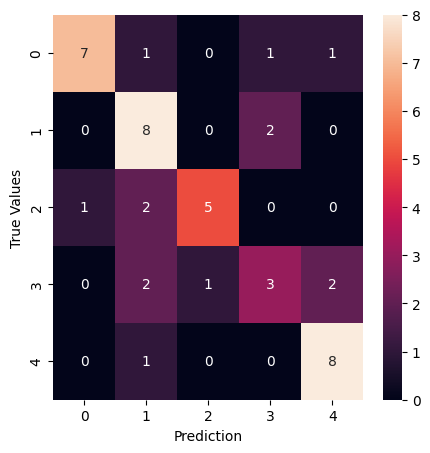

In [76]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot = True)
plt.xlabel("Prediction")
plt.ylabel("True Values")
plt.show()

In [77]:
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

### Save Model 

In [78]:
!pip install joblib
import joblib

In [79]:
#Save the model as pickel file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

### Save Class Dict

In [80]:
import json
with open("class_dictionary.json", "w") as f:
    f.write(json.dumps(class_dict))

***Here Data scientist job is over, After this AI/ML will work building server and usable for user.***